# **Comparing different ML models**

## **1. Supervised Learning**

## **Data Understanding and Preprocessing**

Importing libraries

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB

In [133]:
from sklearn.metrics import(
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score
)

Data Preprocessing

In [134]:
# Load Breast Cancer Dataset
data = load_breast_cancer()

X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [135]:
print("Dataset Shape: ",X.shape)
print("Classes: ",np.unique(y))

Dataset Shape:  (569, 30)
Classes:  [0 1]


Q1.  Why is scaling required for KNN but not mandatory for Decision Trees?
- KNN requires scaling because it relies on distance calculation, on the
other hand Decision Tree uses feature splits so scaling is not needed.

---

Q2.  Which algorithms are sensitive to feature scaling?
- Algorithms sensitive to feature scaling are KNN, Logistic Regression and K-Means because they are based on distance calculation.

# **Classification Models Implementation**

## Training of different models

In [136]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## **1. Logistic Regression**

In [137]:
# Feature Scaling (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
# Model Training
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [139]:
# Prediction
log_pred = log_model.predict(X_test)

## **2. KNN Model**

When K = 3

In [140]:
knn_k3_model = KNeighborsClassifier(n_neighbors=3)
knn_k3_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [141]:
knn_k3_pred = knn_k3_model.predict(X_test)

When K = 7

In [142]:
knn_k7_model = KNeighborsClassifier(n_neighbors=7)
knn_k7_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [143]:
knn_k7_pred = knn_k7_model.predict(X_test)

## **3. Decision Tree**

In [144]:
# Creating and Training of Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [145]:
dt_pred = dt_model.predict(X_test)

## **4. Bagging Classifier (with Decision Tree as Base Estimator)**

In [146]:
bg_model = BaggingClassifier(random_state=42, estimator=DecisionTreeClassifier())
bg_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [147]:
bg_pred = bg_model.predict(X_test)

## **5. Random Forest**

In [148]:
# Creating Training Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [149]:
rf_pred = rf_model.predict(X_test)

## **6. Gaussian Naive Bayes**

In [150]:
gauss_model = GaussianNB()
gauss_model.fit(X_train, y_train)

GaussianNB()

In [151]:
gauss_pred = gauss_model.predict(X_test)

# **Evaluation of Different Models**

In [152]:
def evaluate_model(name, y_test, y_pred):
  print(f"\n{name}Evaluation")
  print("Accuracy: ",accuracy_score(y_test, y_pred))
  print("Precision: ",precision_score(y_test, y_pred))
  print("Recall: ",recall_score(y_test, y_pred))
  print("F1 Score: ",f1_score(y_test, y_pred))
  print("\nConfusion Matrix:\n",confusion_matrix(y_test, y_pred))

In [153]:
evaluate_model("Logistic Regression: ",y_test, log_pred)
evaluate_model("KNN (K=3): ",y_test, knn_k3_pred)
evaluate_model("KNN (K=7): ",y_test, knn_k7_pred)
evaluate_model("Decision Tree: ",y_test, dt_pred)
evaluate_model("Bagging Classifier: ",y_test, bg_pred)
evaluate_model("Random Forest: ",y_test, rf_pred)
evaluate_model("Gaussian Naive Bayes: ",y_test, gauss_pred)


Logistic Regression: Evaluation
Accuracy:  0.9736842105263158
Precision:  0.9722222222222222
Recall:  0.9859154929577465
F1 Score:  0.9790209790209791

Confusion Matrix:
 [[41  2]
 [ 1 70]]

KNN (K=3): Evaluation
Accuracy:  0.9473684210526315
Precision:  0.9577464788732394
Recall:  0.9577464788732394
F1 Score:  0.9577464788732394

Confusion Matrix:
 [[40  3]
 [ 3 68]]

KNN (K=7): Evaluation
Accuracy:  0.9473684210526315
Precision:  0.9577464788732394
Recall:  0.9577464788732394
F1 Score:  0.9577464788732394

Confusion Matrix:
 [[40  3]
 [ 3 68]]

Decision Tree: Evaluation
Accuracy:  0.9473684210526315
Precision:  0.9577464788732394
Recall:  0.9577464788732394
F1 Score:  0.9577464788732394

Confusion Matrix:
 [[40  3]
 [ 3 68]]

Bagging Classifier: Evaluation
Accuracy:  0.956140350877193
Precision:  0.9583333333333334
Recall:  0.971830985915493
F1 Score:  0.965034965034965

Confusion Matrix:
 [[40  3]
 [ 2 69]]

Random Forest: Evaluation
Accuracy:  0.9649122807017544
Precision:  0.9589

## **Comparison Table**

In [154]:
def comparison_table(y_test, y_pred):
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

In [155]:
results = {
    "Logistic Regression": comparison_table(y_test, log_pred),
    "KNN (K=3)": comparison_table(y_test, knn_k3_pred),
    "KNN (K=7)": comparison_table(y_test, knn_k7_pred),
    "Decision Tree": comparison_table(y_test, dt_pred),
    "Bagging Classifier": comparison_table(y_test, bg_pred),
    "Random Forest": comparison_table(y_test, rf_pred),
    "Gaussian Naive Bayes":comparison_table(y_test, gauss_pred)
}

In [156]:
comparison_df = pd.DataFrame(results).T
comparison_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.973684,0.972222,0.985915,0.979021
KNN (K=3),0.947368,0.957746,0.957746,0.957746
KNN (K=7),0.947368,0.957746,0.957746,0.957746
Decision Tree,0.947368,0.957746,0.957746,0.957746
Bagging Classifier,0.956140,0.958333,0.971831,0.965035
Random Forest,0.964912,0.958904,0.985915,0.972222
Gaussian Naive Bayes,0.964912,0.958904,0.985915,0.972222


Q1. Why does Random Forest outperform Decision Trees?
- Random Forest outperforms Decision Tree as a single decision tree migth overfit. But random forest handles this by reducing overfitting and variance

---

Q2. Why might Naive Bayes perform worse despite being fast?
- Naive Bayes is worse as it assumes that features are independent of each other which is not true in real life. And in this medical dataset features depend on each other so it performs worst despite being fast.

---

Q3. Why is Recall important in medical datasets?
- Recall is important in medical dataset to check how many positive cases model has predicted wrong as it can be life-threatening.

---

Q4. Why is KNN slower during prediction?
- KNN is slower as it calculates distance for all the points every time so  it is time-consuming.

## **2. Unsupervised Learning**

## **K-Means Clustering**

In [157]:
from sklearn.cluster import KMeans

In [158]:
# Load Dataset
data = load_breast_cancer()

X = data.data   # features
feature_names = data.feature_names

# Convert to DataFrame for clarity
df = pd.DataFrame(X, columns=feature_names)
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [159]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

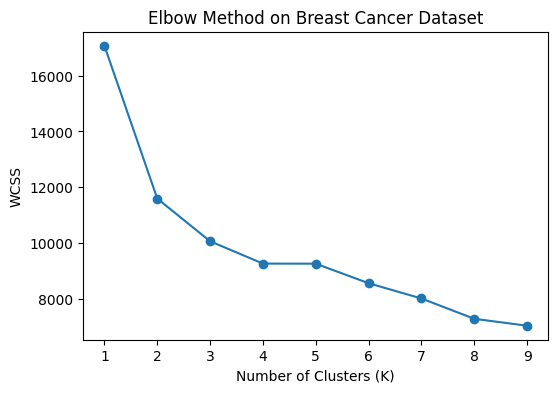

In [160]:
wcss = []

for k in range(1, 10):
  kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,10), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method on Breast Cancer Dataset")
plt.show()

In [161]:
kmeans = KMeans(
    n_clusters=3,
    init="k-means++",
    random_state=42
)
clusters = kmeans.fit_predict(X_scaled)

In [162]:
df["Cluster"] = clusters
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

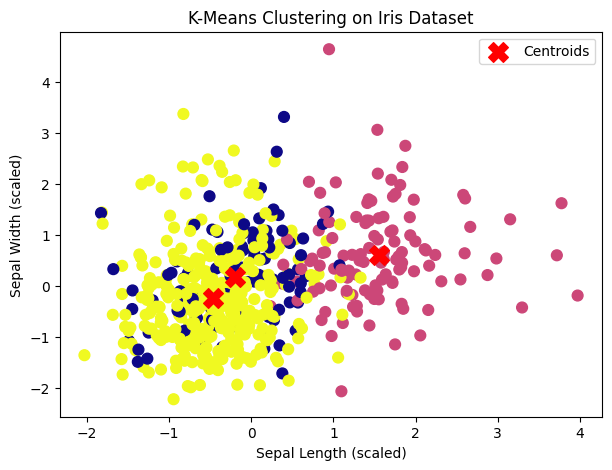

In [163]:
plt.figure(figsize=(7,5))

plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=clusters,
    cmap="plasma",
    s=60
)

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    color="red",
    marker="X",
    s=200,
    label="Centroids"
)

plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()

Q1. Is K-Means supervised or unsupervised? Why?
- K-Means is unsupervised learning because it is trained on unlabeled dataset and thus learns patterns while training.

---

Q2. Why might clusters not match actual labels?
- Clusters might not match actual labels because in K-means clusters are formed based on the features similarity and distance.

## **Scenario Based Questions**

**Scenario 1: Highly imbalanced medical dataset.**
1. Which model would you choose?
- Random Forest as it reduces overfitting and can handle complex features better.
---
2. Which metric would you trust most?
- Recall as it tells about how many wrong predictions were made (positive case is identified as negative during prediction). It helps in medical cases and ensures that no sick patient is missed from treatment as it can be life-threatening.
---
3. Why is accuracy misleading?
- Accuracy is misleading as it does not tell about wrong predictions (false negatives or false positives). Accuracy might just predict only the majority class i.e healthy people and ignoers sick patients.



**Scenario 2: Deployment on a low-memory device.**
1. Which algorithm would you prefer?
- Logistic Regression as it requires very few parameters
---
2. Which algorithm would you avoid?
- KNN and Random Forest as they require more memory
- KNN stores the entire dataset and calcuates distance for every data point.
- Random Forest stores many Decision Trees (like 100 of them) thus require more memory.


## **Reflection**

“What did I learn from comparing multiple machine learning models on the same dataset?”
- While doing this task I learned how different ML models perform, how they are different from each other and also that not a single model is universally best. It tells us that different models performance varies with amount of data, feature & data complexity, how data is stored and so on. While comparing different models it is seen that different algorithms make different assumptions, that affects accuracy, recall, precision and model prediction. It helps us understand how different evaluation metrics matters in different scenarios.